<a href="https://colab.research.google.com/github/FaisalAhmedBijoy/Tensorflow-for-Deep-Learning-Udacity/blob/main/Image_Classification_with_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import PIL
import glob

In [3]:
print('Current working directory: ',os.getcwd())

Current working directory:  /content


## Setup Dataset Path 

In [4]:
'''
building_house=glob.glob('dataset_building/building_house/*.*')
mosque=glob.glob('dataset_building/mosque/*.*')
temple=glob.glob('dataset_building/temple/*.*')
tinshed=glob.glob('dataset_building/tinshed/*.*')
sky_building=glob.glob('dataset_building/sky_building/*.*')
mud_house=glob.glob('dataset_building/mud_house/*.*')
'''


"\nbuilding_house=glob.glob('dataset_building/building_house/*.*')\nmosque=glob.glob('dataset_building/mosque/*.*')\ntemple=glob.glob('dataset_building/temple/*.*')\ntinshed=glob.glob('dataset_building/tinshed/*.*')\nsky_building=glob.glob('dataset_building/sky_building/*.*')\nmud_house=glob.glob('dataset_building/mud_house/*.*')\n"

In [5]:
''' 
print('Building house data : ',len(building_house))
print('Mosque data: ',len(mosque))
print('Temple data: ',len(temple))
print('Tinshed data: ',len(tinshed))
print('Sky building data: ',len(sky_building))
print('Mud house data: ',len(mud_house))
'''


" \nprint('Building house data : ',len(building_house))\nprint('Mosque data: ',len(mosque))\nprint('Temple data: ',len(temple))\nprint('Tinshed data: ',len(tinshed))\nprint('Sky building data: ',len(sky_building))\nprint('Mud house data: ',len(mud_house))\n"

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
train_path='/content/drive/My Drive/CSE 4000 Thesis/Dataset1500/train'
test_path='/content/drive/My Drive/CSE 4000 Thesis/Dataset1500/test'
print(os.listdir(train_path))
print(os.listdir(test_path))

['building_house', 'mosque', 'temple', 'tinshed', 'mud_house', 'sky_building']
['mud_house', 'building_house', 'mosque', 'sky_building', 'temple', 'tinshed']


## Dataset Preprocssing using ImageDataGenerator

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [9]:
WIDTH=224
HEIGHT=224

In [10]:
train_generator = ImageDataGenerator(rescale=1./255,
                                    horizontal_flip=True,
                                    shear_range=0.1 ,
                                    zoom_range=0.1,
                                    rotation_range=10,
                                    height_shift_range=0.1,
                                    fill_mode='nearest',
                                    validation_split=0.2)
                                     
train_dataset = train_generator.flow_from_directory(batch_size=32,
                                                 directory=train_path,
                                                 shuffle=True,
                                                 target_size=(WIDTH, HEIGHT),
                                                 class_mode='categorical',
                                                 subset='training')

validation_dataset = train_generator.flow_from_directory(batch_size=32,
                                                 directory=train_path,
                                                 shuffle=True,
                                                 target_size=(WIDTH, HEIGHT), 
                                                 class_mode='categorical',
                                                 subset='validation')

Found 960 images belonging to 6 classes.
Found 240 images belonging to 6 classes.


In [11]:
test_generator=ImageDataGenerator(rescale=1./255)
test_dataset = test_generator.flow_from_directory(batch_size=32,
                                                 directory=test_path,
                                                 shuffle=True,
                                                 target_size=(WIDTH, HEIGHT), 
                                                 class_mode='categorical')

Found 300 images belonging to 6 classes.


In [12]:
train_dataset.class_indices

{'building_house': 0,
 'mosque': 1,
 'mud_house': 2,
 'sky_building': 3,
 'temple': 4,
 'tinshed': 5}

In [13]:
validation_dataset.class_indices

{'building_house': 0,
 'mosque': 1,
 'mud_house': 2,
 'sky_building': 3,
 'temple': 4,
 'tinshed': 5}

In [14]:
total_class=len(train_dataset.class_indices)
print('Number of classes in dataset: ',total_class)

Number of classes in dataset:  6


## Plot some random image
- class 0: building house
- class 1: mosque
- class 2: mud house
- class 3: sky building
- class 4: temple
- class 5: tinshed

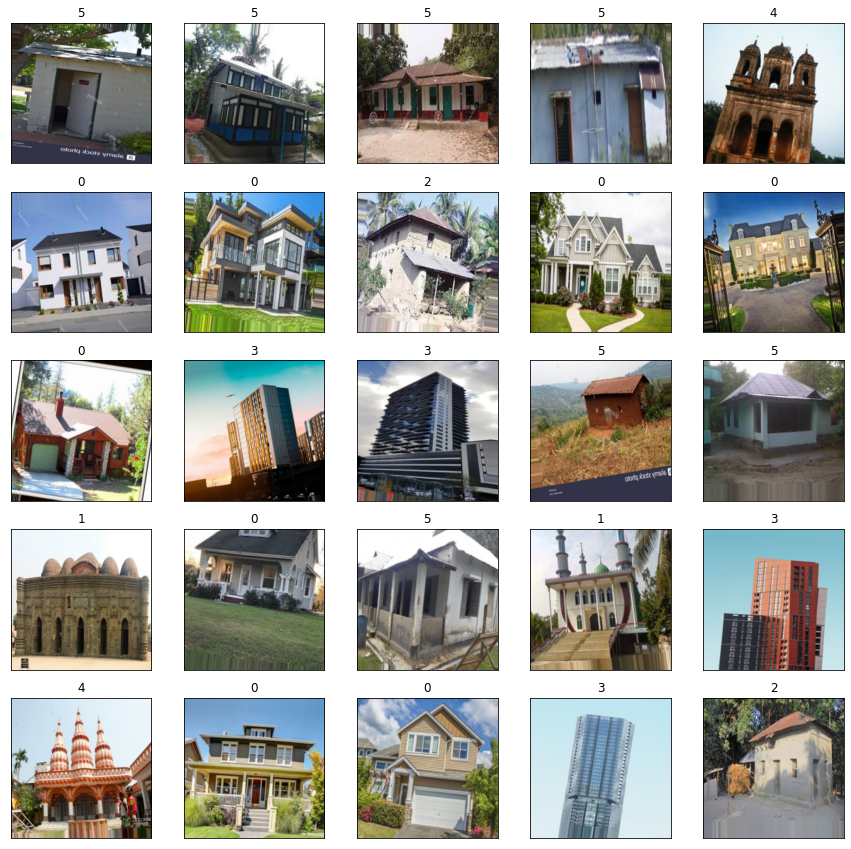

In [15]:
x,y=train_dataset.next()
fig=plt.figure(figsize=(15,15))
rows=5
cols=5
for i in range(rows*cols):
    fig.add_subplot(rows,cols,i+1)
    image=x[i]
    plt.imshow(image)
    plt.title(np.argmax(y[i]))
    plt.xticks([])
    plt.yticks([])
    
plt.show()

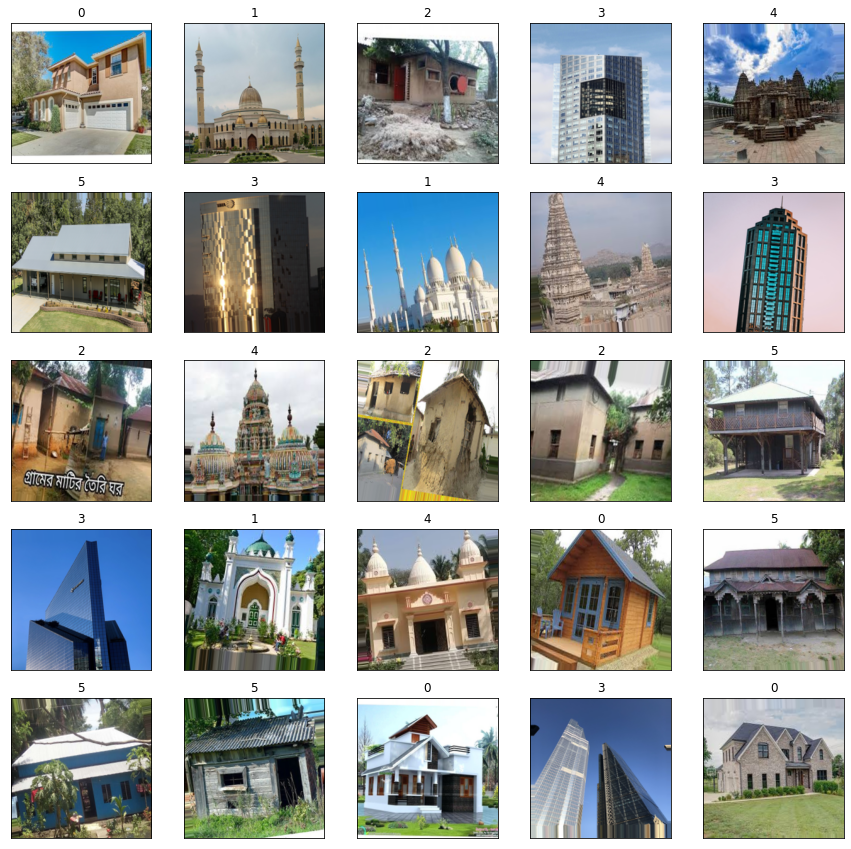

In [16]:
x,y=validation_dataset.next()
fig=plt.figure(figsize=(15,15))
rows=5
cols=5
for i in range(rows*cols):
    fig.add_subplot(rows,cols,i+1)
    image=x[i]
    plt.imshow(image)
    plt.title(np.argmax(y[i]))
    plt.xticks([])
    plt.yticks([])
    
plt.show()

## Define Convolutional Neural Network Architecture

In [17]:
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.models import Sequential

In [18]:
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(224,224,3),activation='relu',padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Conv2D(filters=256,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Dropout(0.2))
model.add(Flatten())

model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(total_class,activation='softmax'))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 256)       2

## Compile CNN Model

In [20]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

## Trained  CNN Model

In [21]:
epochs=200
batch_size=32
trainset_length=len(train_dataset.labels)
validation_length=len(validation_dataset.labels)
steps_per_epoch=(trainset_length//batch_size)
validation_steps=(validation_length//batch_size)
print(trainset_length)
print(validation_length)
print(steps_per_epoch)
print(validation_steps)

960
240
30
7


In [22]:
from keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath='/content/drive/MyDrive/CSE 4000 Thesis/Transfer Learning TF Keras/building.model.best.hdf5', verbose=1 ,save_best_only=True)

In [23]:
history = model.fit(train_dataset,
                    steps_per_epoch = steps_per_epoch,
                    epochs=epochs,
                    validation_data=validation_dataset,
                    validation_steps=validation_steps,callbacks=[checkpointer])

Epoch 1/200
30/30 [==============================] - 22s 633ms/step - loss: 2.1538 - accuracy: 0.1967 - val_loss: 1.5694 - val_accuracy: 0.3661

Epoch 00001: val_loss improved from inf to 1.56938, saving model to /content/drive/MyDrive/CSE 4000 Thesis/Transfer Learning TF Keras/building.model.best.hdf5
Epoch 2/200
30/30 [==============================] - 20s 663ms/step - loss: 1.4405 - accuracy: 0.4124 - val_loss: 1.3055 - val_accuracy: 0.4286

Epoch 00002: val_loss improved from 1.56938 to 1.30549, saving model to /content/drive/MyDrive/CSE 4000 Thesis/Transfer Learning TF Keras/building.model.best.hdf5
Epoch 3/200
30/30 [==============================] - 20s 660ms/step - loss: 1.2090 - accuracy: 0.5491 - val_loss: 1.2248 - val_accuracy: 0.5089

Epoch 00003: val_loss improved from 1.30549 to 1.22475, saving model to /content/drive/MyDrive/CSE 4000 Thesis/Transfer Learning TF Keras/building.model.best.hdf5
Epoch 4/200
30/30 [==============================] - 20s 661ms/step - loss: 1.18

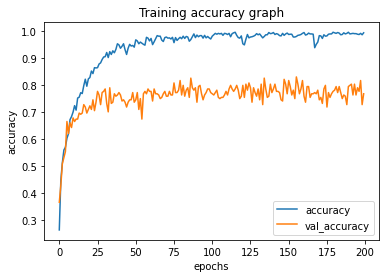

In [24]:
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Training accuracy graph')
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()

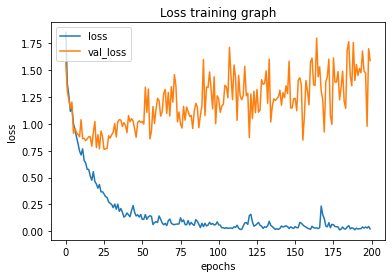

In [25]:
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Loss training graph')
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

## Testing the model

In [26]:
test_loss,test_accuracy=model.evaluate(validation_dataset)

8/8 [==============================] - 4s 519ms/step - loss: 1.5951 - accuracy: 0.7667


In [27]:
print('Accuracy of the model is : ',test_accuracy*100)

Accuracy of the model is :  76.66666507720947


## Save Model h5 format
This file includes
- Model architecture
- Model weight values during training
- model training config 
- optimizer 

In [28]:
import time
t = time.time()
export_path_keras = "/content/drive/MyDrive/CSE 4000 Thesis/Transfer Learning TF Keras/CNN_model{}_time_{}.h5".format(test_accuracy,int(t))
print(export_path_keras)
model.save(export_path_keras)

/content/drive/MyDrive/CSE 4000 Thesis/Transfer Learning TF Keras/CNN_model0.7666666507720947_time_1619798881.h5


## Reload the model h5 format

In [29]:
from tensorflow.keras.models import load_model

In [30]:
reload_model=load_model(export_path_keras)
reload_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 256)       2

## Check Random Image

In [31]:
image_batch,label_batch=next(iter(validation_dataset))

In [32]:
label_batch[:5]

array([[0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0.]], dtype=float32)

## Classification report 

In [33]:
predicted_result=model.predict(validation_dataset)
predicted_result[:5]

array([[2.3459025e-02, 9.2759365e-05, 1.8835249e-11, 5.2424026e-13,
        9.7643125e-01, 1.6984992e-05],
       [9.9915230e-01, 1.1225385e-06, 3.4658954e-04, 2.5529491e-07,
        3.3976434e-08, 4.9969333e-04],
       [9.9848652e-01, 3.1478060e-11, 3.2511396e-13, 1.9571305e-20,
        1.5023855e-03, 1.1012504e-05],
       [3.4100321e-05, 1.1348801e-03, 8.6151779e-01, 1.6054988e-03,
        1.3559952e-01, 1.0826751e-04],
       [2.9305720e-09, 9.9997246e-01, 1.4122258e-10, 2.7027908e-11,
        2.7509708e-05, 3.2437348e-17]], dtype=float32)

In [34]:
predicted_value=np.argmax(model.predict(validation_dataset),axis=-1)
predicted_value

array([5, 3, 1, 0, 5, 0, 3, 3, 3, 4, 4, 4, 0, 3, 5, 4, 4, 0, 2, 0, 2, 2,
       1, 5, 2, 3, 2, 2, 2, 3, 5, 5, 0, 3, 3, 1, 5, 0, 5, 4, 0, 5, 2, 5,
       1, 2, 3, 3, 2, 5, 1, 4, 1, 4, 5, 1, 0, 3, 5, 2, 3, 3, 1, 0, 3, 5,
       3, 1, 1, 2, 4, 2, 0, 4, 4, 0, 0, 5, 1, 0, 5, 2, 0, 0, 5, 0, 4, 5,
       0, 2, 5, 5, 3, 2, 2, 1, 0, 2, 5, 2, 4, 4, 1, 0, 0, 1, 3, 2, 0, 1,
       5, 4, 1, 4, 5, 4, 2, 1, 3, 4, 2, 1, 5, 0, 3, 5, 3, 2, 3, 4, 3, 2,
       5, 5, 0, 2, 2, 2, 1, 2, 0, 0, 2, 0, 2, 5, 1, 0, 0, 4, 1, 3, 4, 0,
       3, 1, 1, 0, 0, 0, 1, 2, 4, 2, 1, 5, 2, 5, 1, 2, 2, 4, 1, 2, 1, 2,
       3, 0, 0, 2, 5, 3, 1, 2, 0, 3, 2, 4, 4, 3, 3, 2, 4, 2, 0, 2, 1, 2,
       5, 1, 5, 2, 4, 5, 5, 5, 0, 5, 0, 0, 1, 2, 4, 1, 5, 1, 4, 4, 1, 5,
       2, 4, 3, 0, 3, 1, 3, 2, 5, 5, 3, 3, 1, 1, 5, 5, 5, 4, 1, 0])

In [35]:
validation_value=validation_dataset.classes
validation_value

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
      dtype=int32)

In [36]:
from sklearn.metrics import accuracy_score
print('Accuracy score: ',accuracy_score(validation_dataset.classes,predicted_value))

Accuracy score:  0.19166666666666668


In [37]:
from sklearn.metrics import classification_report
print('classification report \n',classification_report(validation_dataset.classes,predicted_value))

classification report 
               precision    recall  f1-score   support

           0       0.17      0.17      0.17        40
           1       0.21      0.20      0.20        40
           2       0.17      0.20      0.18        40
           3       0.17      0.15      0.16        40
           4       0.16      0.12      0.14        40
           5       0.27      0.30      0.29        40

    accuracy                           0.19       240
   macro avg       0.19      0.19      0.19       240
weighted avg       0.19      0.19      0.19       240



## Another approach to calculate the classification report

In [38]:
predicted_array=model.predict(validation_dataset)
predicted_array

array([[9.9858356e-01, 2.7012724e-05, 2.4920089e-08, 8.9700006e-07,
        7.2751485e-04, 6.6099688e-04],
       [1.0000000e+00, 3.5566321e-15, 5.6877825e-28, 1.4601430e-26,
        4.0750420e-14, 9.0115193e-11],
       [1.5122316e-21, 6.0079581e-19, 1.0000000e+00, 1.6429578e-30,
        7.1484174e-25, 1.4467263e-10],
       ...,
       [2.8000681e-23, 1.7062030e-24, 7.7687466e-17, 1.0000000e+00,
        1.3787182e-25, 1.5885356e-11],
       [1.3225982e-01, 8.2034239e-04, 7.4467835e-08, 5.3813500e-07,
        8.6691511e-01, 4.0848695e-06],
       [3.0360915e-11, 6.3030361e-20, 3.0308495e-11, 3.7042295e-22,
        3.3932763e-19, 1.0000000e+00]], dtype=float32)